In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, RocCurveDisplay, classification_report

## Verilerin Gözden Geçirilmesi

Not: Geçen hafta yapılan aynı veri setinin butik bir haliyle yapılmıştır. Veri önişlem basamakları aynı olsa bile burada kullanılan modellerin hiperparametreleri değiştirilerek daha iyi sonuçlar alınmaya çalışılmıştır.

**Sütunların Açıklaması**

AGE: (yıl cinsinden yaş)

Sex: (1 = erkek; 0 = kadın)

CP (göğüs ağrısı türü)

TRESTBPS (istirahat kan basıncı (hastaneye girişte mm Hg olarak))

CHOL (mg/dl cinsinden serum kolesterolü)

FPS (açlık şekeri > 120 mg/dl) (1 = doğru; 0 = yanlış)

RESTECH (dinlenme elektrokardiyografik sonuçları)

THALACH (maksimum kalp atış hızına ulaşıldı)

EXANG (egzersize bağlı anjina pektoris (1=evet; 0=hayır))

OLDPEAK (dinlenmeye karşı egzersize bağlı ST depresyonu)

EĞİM (efor sırasında tepe ST segmentinin eğimi)

CA (florosopi ile boyanmış ana damar sayısı (0-3))

THAL (3 = normal; 6 = sabit hata; 7 = geri döndürülebilir hata)

TARGET: (1 veya 0)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/MachineLearning/Assignments/Assignment7/Dataset/heart-small.csv'
dataset = pd.read_csv(path)
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Verilerin Grafik Üzerinde İncelenmesi

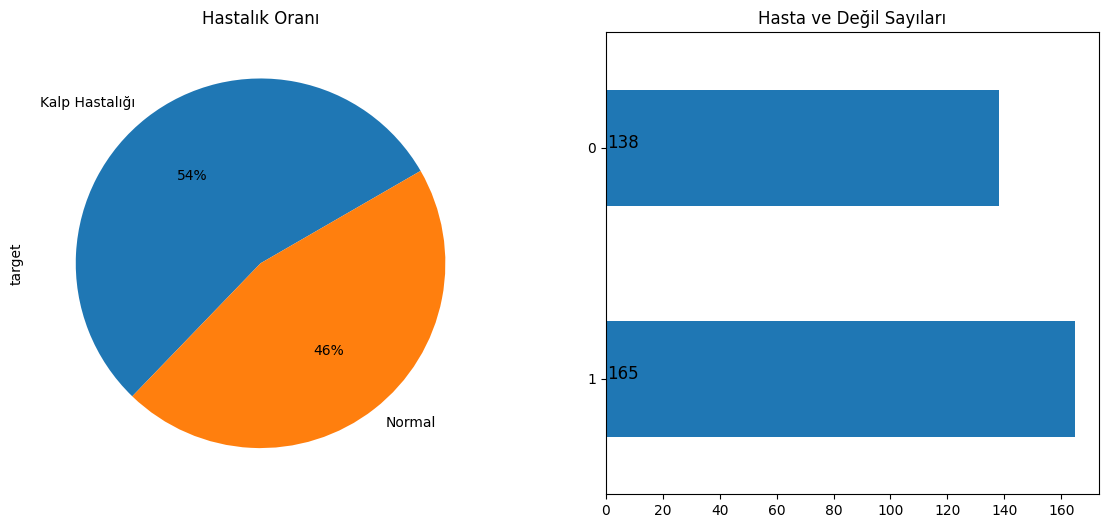

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie(
    x="Kalp Hastalığı",
    y ='Hasta sayısı',
    autopct = "%1.0f%%",
    labels=["Kalp Hastalığı","Normal"],
    startangle = 30,
    ax=ax1
);
ax1.set(title = "Hastalık Oranı")

ax2 = dataset["target"].value_counts().plot(kind="barh" ,ax=ax2)

for i,j in enumerate(dataset["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)

ax2.set(title = "Hasta ve Değil Sayıları")
plt.show()

Cinsiyet ve yaş dağılımları gösterilmiştir.

In [ ]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
histogram_data = dataset.groupby("target")
histogram_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


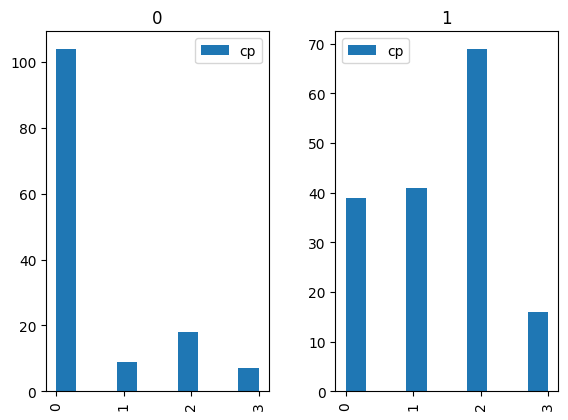

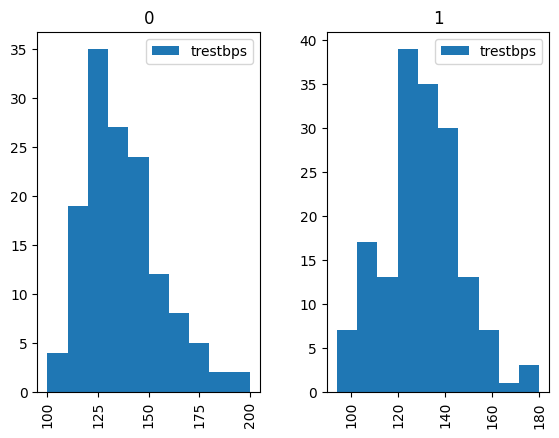

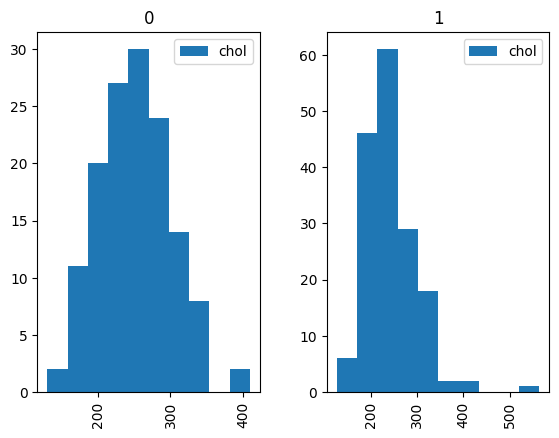

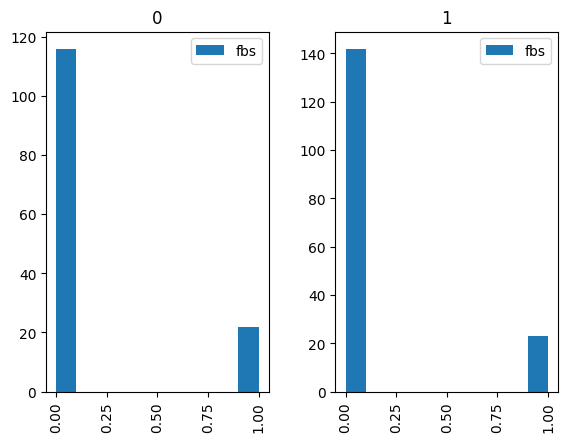

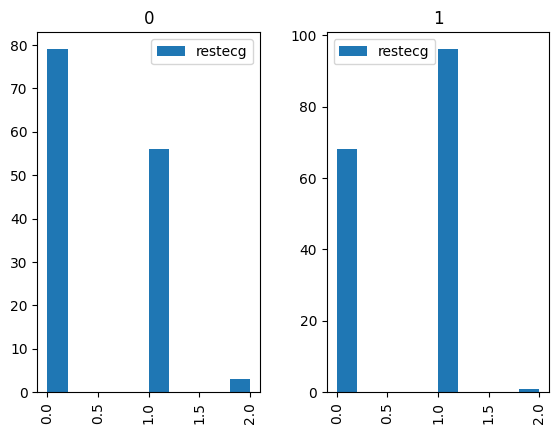

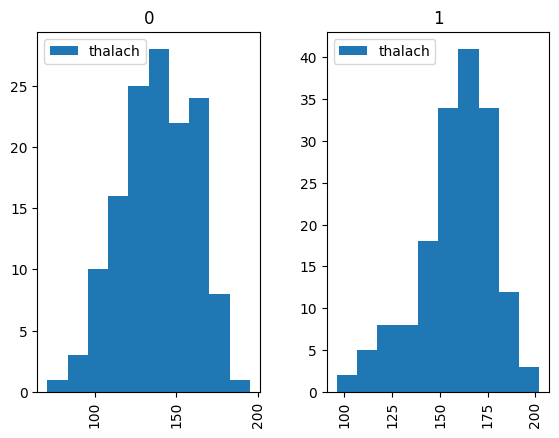

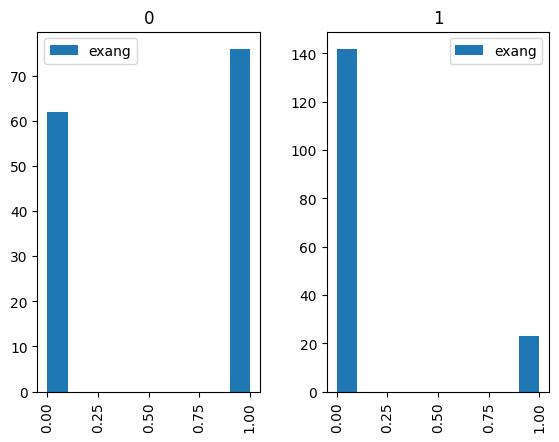

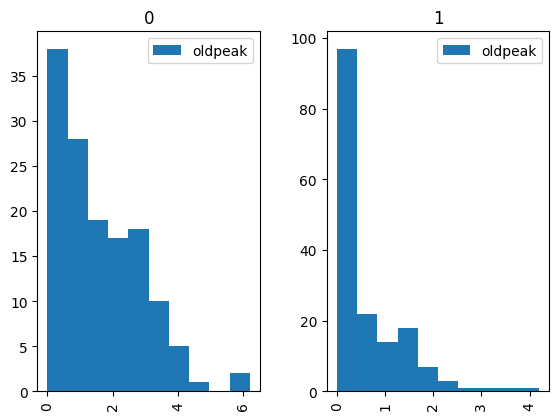

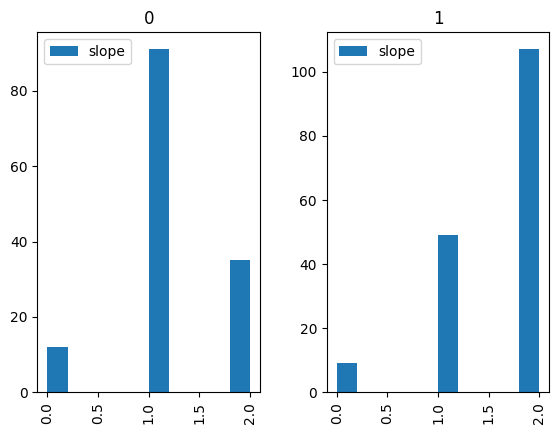

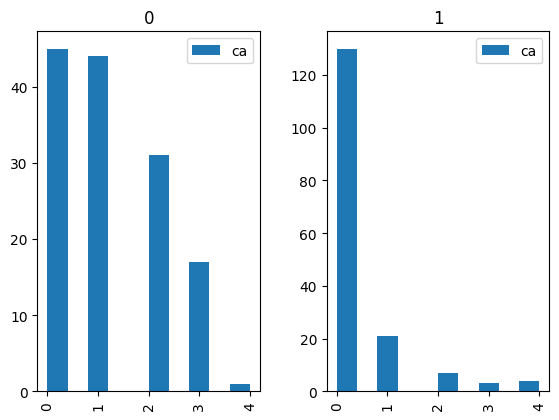

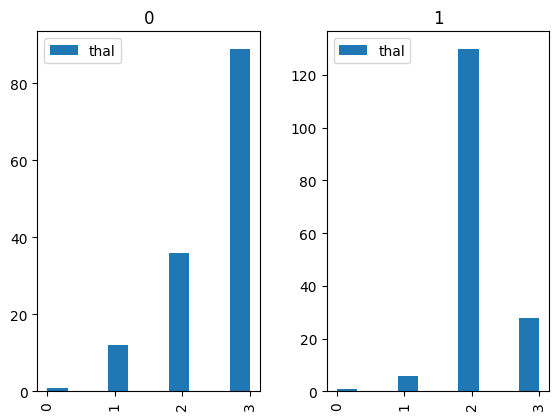

In [ ]:
for i, column in enumerate(['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']):
  dataset[column].hist(by=dataset["target"], legend=True)

Her bir değişkenin target'a göre histogramları gösterilmiştir.

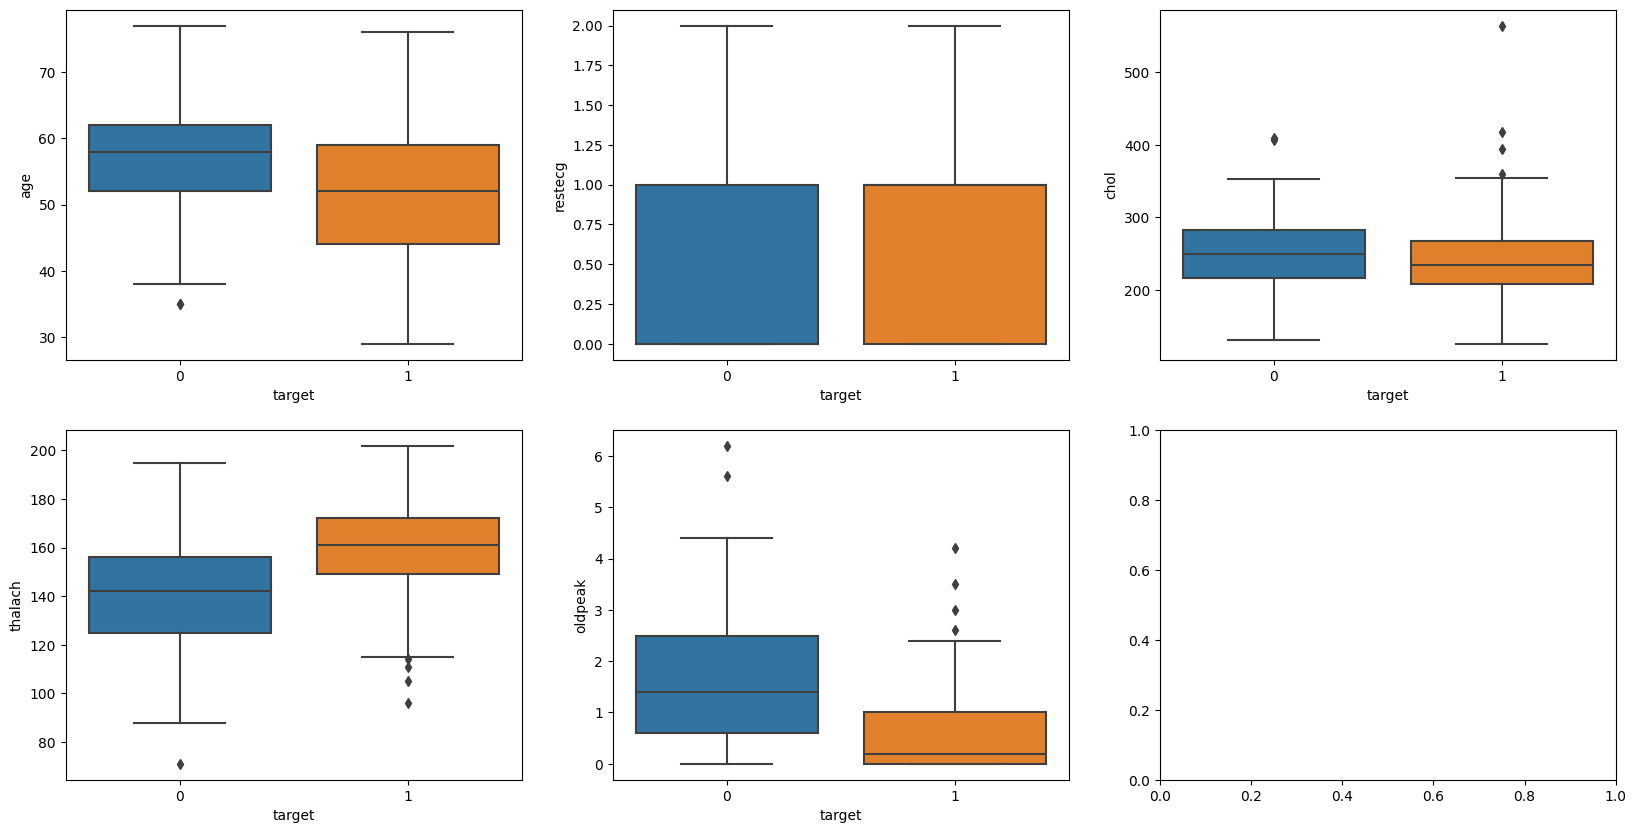

In [ ]:
columns=["age","restecg","chol", "thalach","oldpeak"]
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(columns):
    sns.boxplot(x="target", y=col, data=dataset, ax=ax[i//3][i%3])

Sürekli olan değişkenlerin ayrık değerleri incelenmiştir.

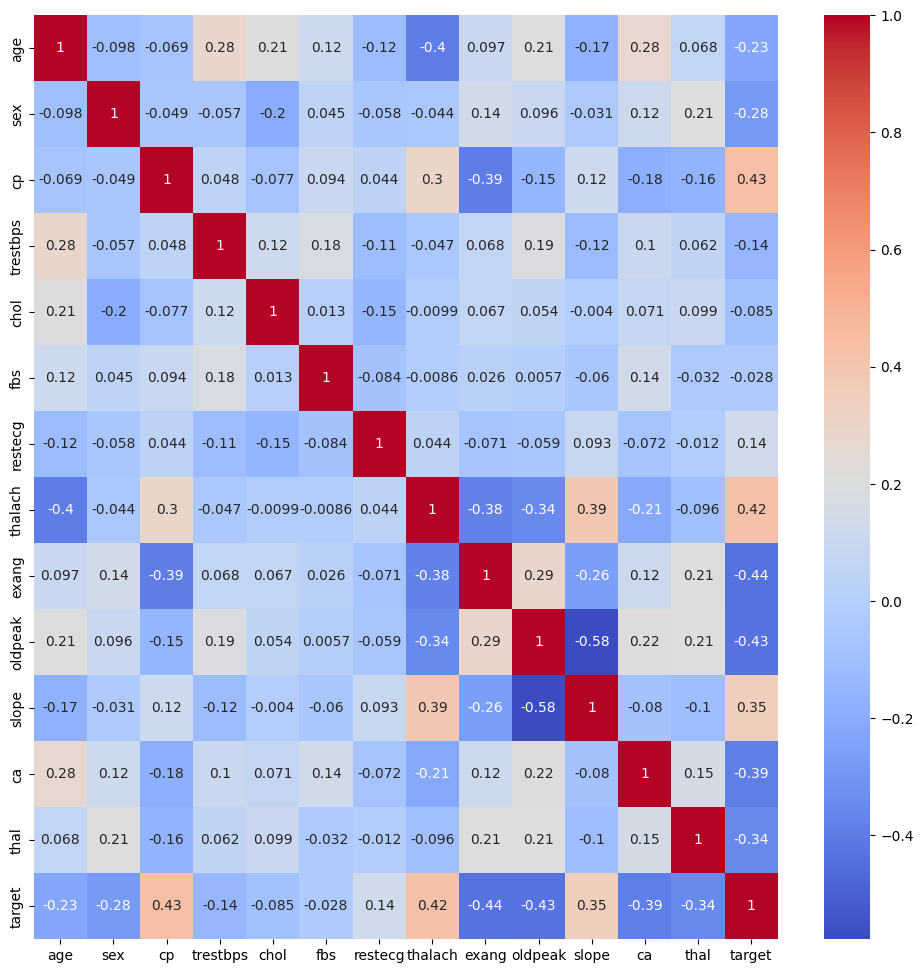

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm");

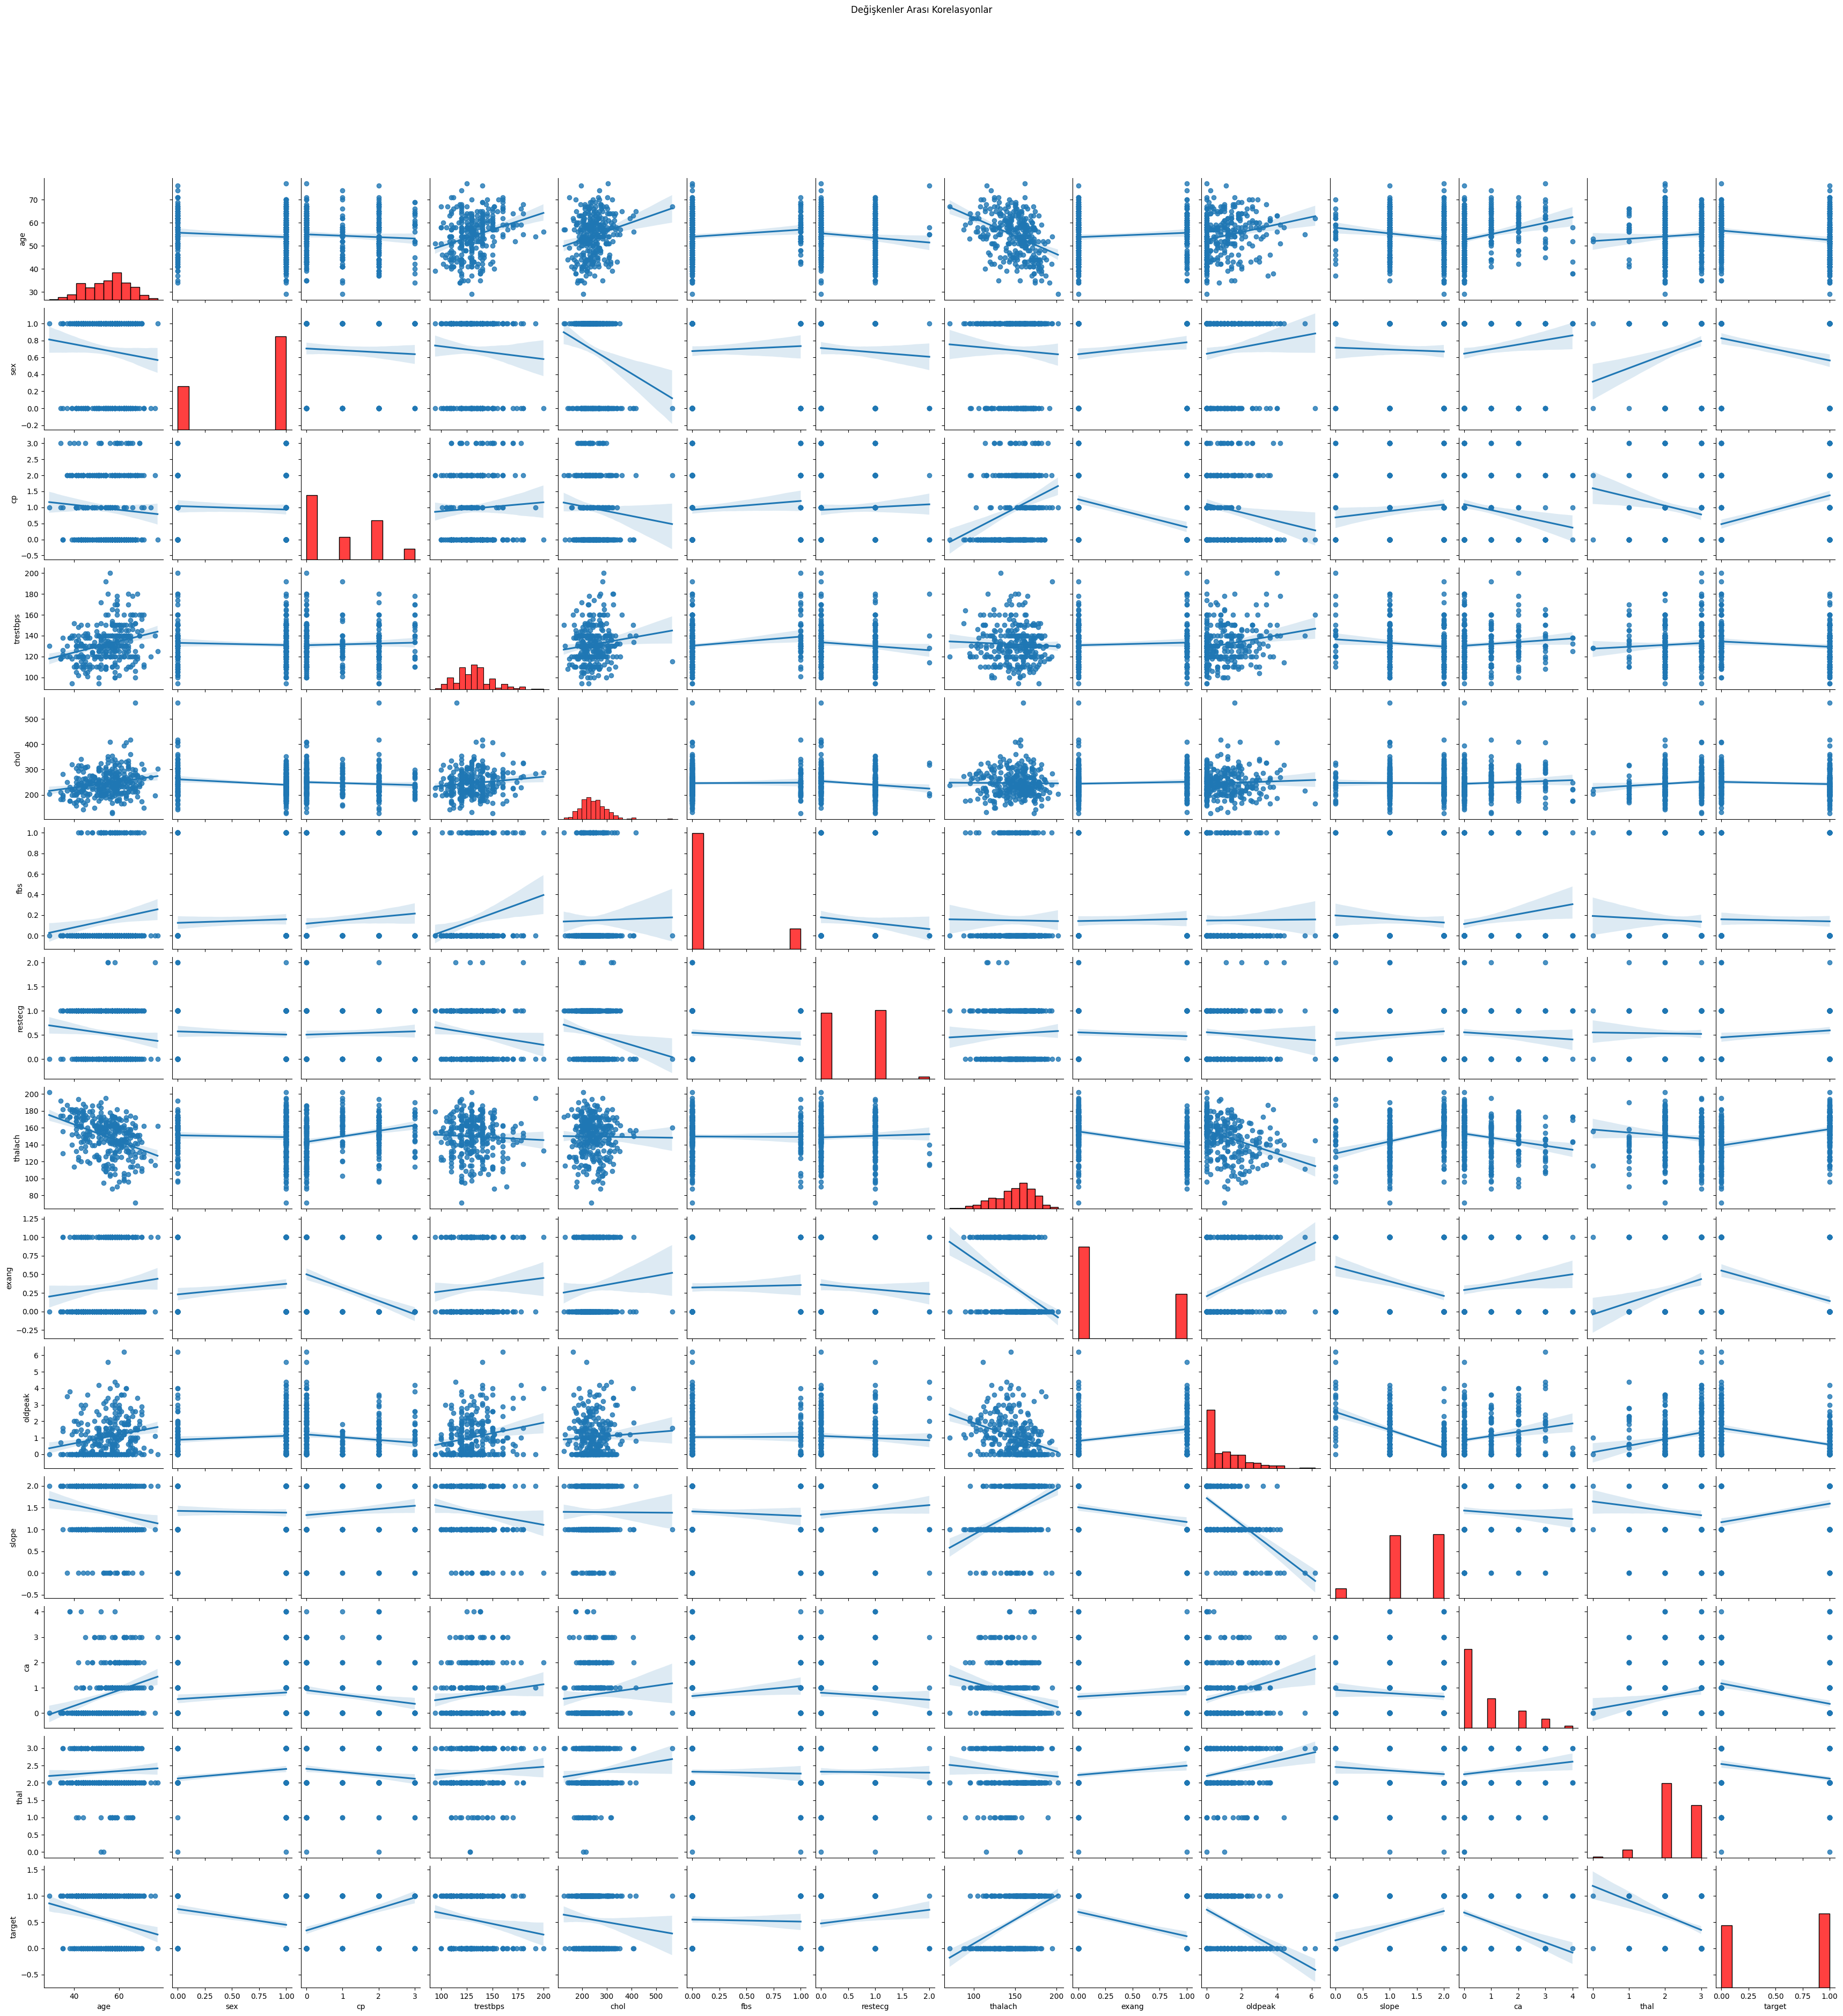

In [ ]:
g= sns.pairplot(dataset ,kind="reg",diag_kws= {'color': 'red'})
g.fig.suptitle("Değişkenler Arası Korelasyonlar", y=1.08)
plt.show()

Heatmap ve scatterplot incelemelerinden sonra güçlü negatif veya pozitif bir korelasyon görülmemiştir.

## Modellerin oluşturulması

In [ ]:
y = dataset['target']
X = dataset.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
def show_roc_curve(model, model_name, X_test, y_test):
  y_scores = model.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic of ' + model_name)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('ROC Curve of ' + model_name)
  plt.show()

In [ ]:
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score'])

In [ ]:
def add_scores(y_test, y_test_pred, model_name):
  acc = accuracy_score(y_test, y_test_pred)
  rec = recall_score(y_test, y_test_pred)
  prec = precision_score(y_test, y_test_pred)
  f1 = f1_score(y_test, y_test_pred)
  model_performance.loc[model_name] = [acc, rec, prec, f1]
  print(model_performance.sort_values("F1-Score", ascending=False))

In [ ]:
def accuracy_graph(gscv):
  test_scores = gscv.cv_results_['mean_test_score']
  train_scores = gscv.cv_results_['mean_train_score']

  plt.plot(test_scores, label='test')
  plt.plot(train_scores, label='train')
  plt.legend(loc='best')
  plt.show()

## 1-) KNN

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X_train_scaled, y_train, cv=5)

print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.81395349 0.8372093  0.78571429 0.73809524 0.78571429]
cv_scores mean:0.7921373200442968


In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': np.arange(1, 16),
    'p': np.arange(1,4)
}
knn_gscv = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
knn_gscv.fit(X_train_scaled, y_train)
pd.DataFrame(knn_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,33,15,27,9,24
mean_fit_time,0.001106,0.001222,0.001227,0.001194,0.001134
std_fit_time,0.000042,0.000108,0.000171,0.000111,0.000064
mean_score_time,0.002621,0.002728,0.002669,0.002571,0.002644
std_score_time,0.000086,0.000126,0.000114,0.000078,0.000103
param_n_neighbors,12,6,10,4,9
param_p,1,1,1,1,1
params,"{'n_neighbors': 12, 'p': 1}","{'n_neighbors': 6, 'p': 1}","{'n_neighbors': 10, 'p': 1}","{'n_neighbors': 4, 'p': 1}","{'n_neighbors': 9, 'p': 1}"
split0_test_score,0.883721,0.906977,0.883721,0.883721,0.883721
split1_test_score,0.883721,0.837209,0.860465,0.860465,0.883721
split2_test_score,0.833333,0.857143,0.785714,0.833333,0.785714


In [ ]:
print(f"En iyi parametreler {knn_gscv.best_params_}, en iyi skor {knn_gscv.best_score_}")

En iyi parametreler {'n_neighbors': 12, 'p': 1}, en iyi skor 0.8534883720930232


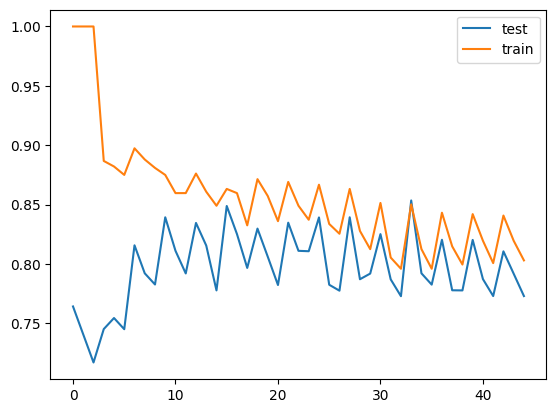

In [ ]:
accuracy_graph(knn_gscv)

In [ ]:
best_knn = knn_gscv.best_estimator_

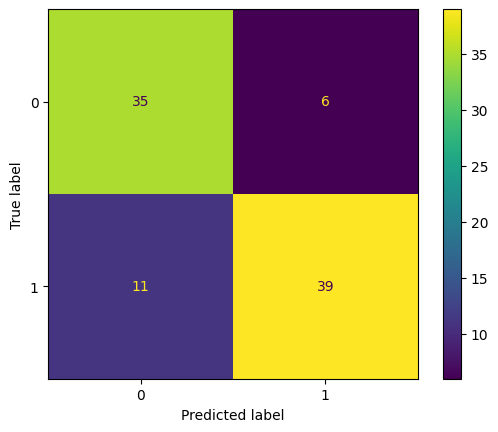

In [ ]:
y_test_pred = best_knn.predict(X_test_scaled)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.76      0.85      0.80        41
    target 1       0.87      0.78      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



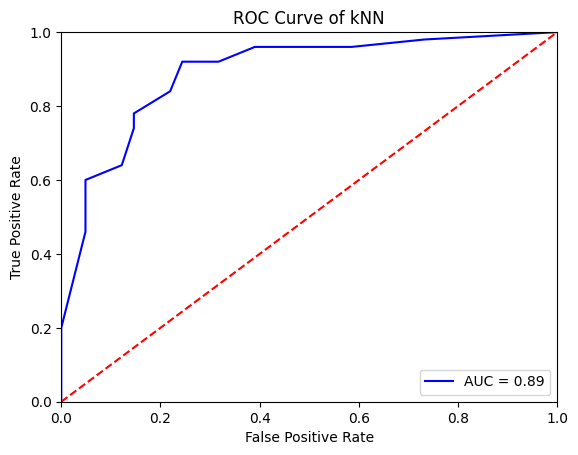

In [ ]:
show_roc_curve(best_knn, 'kNN', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "kNN")

     Accuracy  Recall  Precision  F1-Score
kNN  0.813187    0.78   0.866667  0.821053


## 2-) NaiveBayes

In [ ]:
power_transformer = PowerTransformer()
X_train_transformed = power_transformer.fit_transform(X_train)
X_test_transformed = power_transformer.transform(X_test)

In [ ]:
nb = BernoulliNB()
param_grid = {
    'fit_prior': np.array([True, False]),
    'force_alpha': np.array([True, False]),
    'alpha': np.array([0,1,2])
}
nb_gscv = GridSearchCV(nb, param_grid, cv=5, return_train_score=True)
nb_gscv.fit(X_train_transformed, y_train);
pd.DataFrame(nb_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, 

,0,1,4,5,8
mean_fit_time,0.003276,0.00194,0.001942,0.001725,0.00236
std_fit_time,0.003194,0.000352,0.000574,0.000191,0.000644
mean_score_time,0.000919,0.001397,0.000848,0.000852,0.00129
std_score_time,0.000222,0.000154,0.000069,0.000135,0.000492
param_alpha,0,0,1,1,2
param_fit_prior,True,True,True,True,True
param_force_alpha,True,False,True,False,True
params,"{'alpha': 0, 'fit_prior': True, 'force_alpha':...","{'alpha': 0, 'fit_prior': True, 'force_alpha':...","{'alpha': 1, 'fit_prior': True, 'force_alpha':...","{'alpha': 1, 'fit_prior': True, 'force_alpha':...","{'alpha': 2, 'fit_prior': True, 'force_alpha':..."
split0_test_score,0.883721,0.883721,0.883721,0.883721,0.883721
split1_test_score,0.837209,0.837209,0.837209,0.837209,0.837209


In [ ]:
print(f"En iyi parametreler {nb_gscv.best_params_}, en iyi skor {nb_gscv.best_score_}")

En iyi parametreler {'alpha': 0, 'fit_prior': True, 'force_alpha': True}, en iyi skor 0.8346622369878183


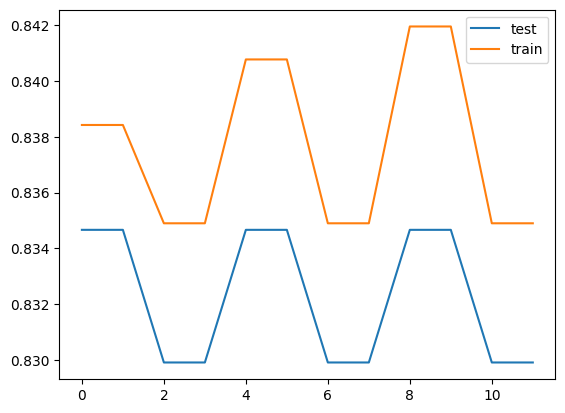

In [ ]:
accuracy_graph(nb_gscv)

In [ ]:
best_nb = nb_gscv.best_estimator_

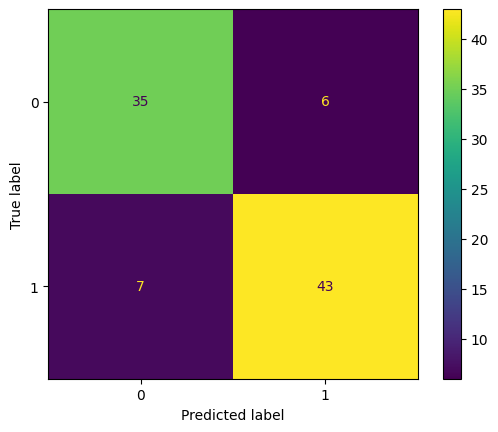

In [ ]:
y_test_pred = best_nb.predict(X_test_transformed)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.83      0.85      0.84        41
    target 1       0.88      0.86      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



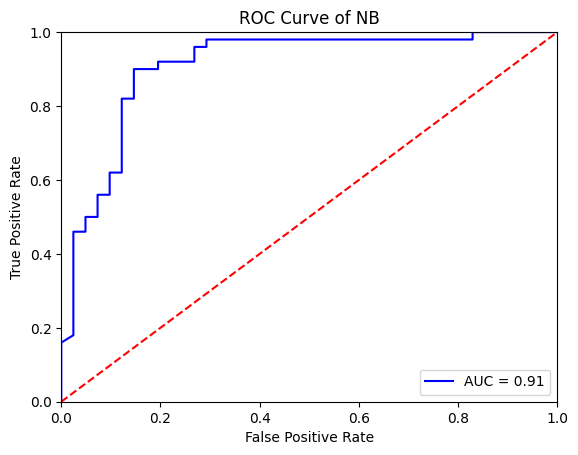

In [ ]:
show_roc_curve(best_nb, 'NB', X_test_transformed, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "NB")

     Accuracy  Recall  Precision  F1-Score
NB   0.857143    0.86   0.877551  0.868687
kNN  0.813187    0.78   0.866667  0.821053


## 3-) Logistic Regression

In [ ]:
lr = LogisticRegression()
param_grid = {
    'solver': np.array(['newton-cg', 'lbfgs', 'liblinear']),
    'penalty': np.array(['l1', 'l2']),
    'C': np.array([100, 10, 1.0, 0.1, 0.01])
}
lr_gscv = GridSearchCV(lr, param_grid, cv=5, return_train_score=True)
lr_gscv.fit(X_train_scaled, y_train);
pd.DataFrame(lr_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

,14,17,16,15,4
mean_fit_time,0.003295,0.001415,0.004977,0.007041,0.007551
std_fit_time,0.002368,0.000081,0.000394,0.001569,0.001912
mean_score_time,0.001044,0.000812,0.000923,0.000964,0.000984
std_score_time,0.000307,0.000029,0.000037,0.000087,0.000082
param_C,1.0,1.0,1.0,1.0,100.0
param_penalty,l1,l2,l2,l2,l2
param_solver,liblinear,liblinear,lbfgs,newton-cg,lbfgs
params,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline...","{'C': 1.0, 'penalty': 'l2', 'solver': 'libline...","{'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}","{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...","{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}"
split0_test_score,0.883721,0.883721,0.860465,0.860465,0.883721
split1_test_score,0.790698,0.790698,0.790698,0.790698,0.790698


In [ ]:
print(f"En iyi parametreler {nb_gscv.best_params_}, en iyi skor {nb_gscv.best_score_}")

En iyi parametreler {'alpha': 0, 'fit_prior': True, 'force_alpha': True}, en iyi skor 0.8346622369878183


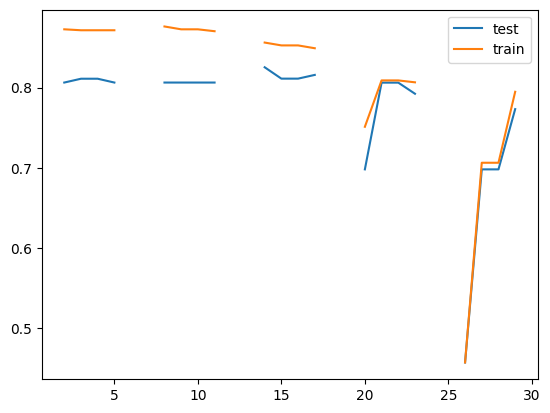

In [ ]:
accuracy_graph(lr_gscv)

In [ ]:
best_lr = lr_gscv.best_estimator_

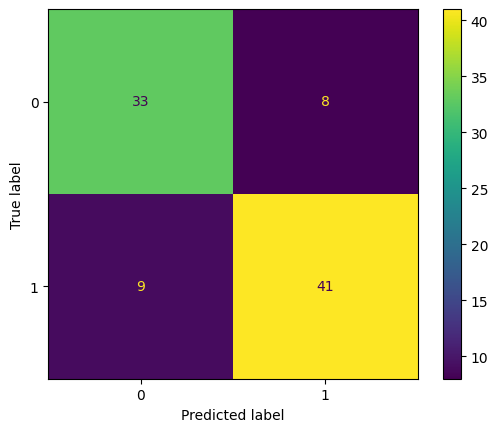

In [ ]:
y_test_pred = best_lr.predict(X_test_scaled)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.79      0.80      0.80        41
    target 1       0.84      0.82      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



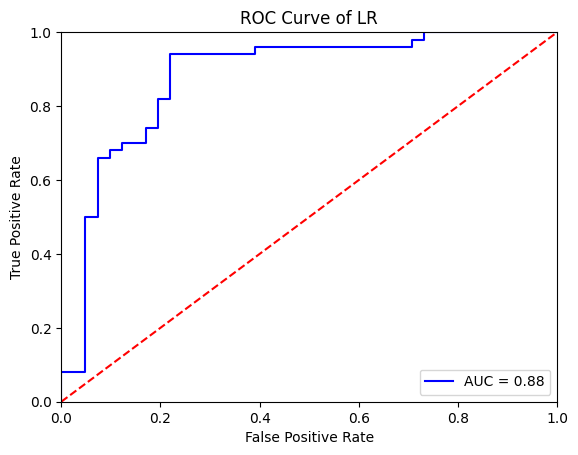

In [ ]:
show_roc_curve(best_lr, 'LR', X_test_scaled, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "LR")

     Accuracy  Recall  Precision  F1-Score
NB   0.857143    0.86   0.877551  0.868687
LR   0.813187    0.82   0.836735  0.828283
kNN  0.813187    0.78   0.866667  0.821053


## 4-) DecisionTree

In [ ]:
dt = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dt_gscv = GridSearchCV(dt, param_grid, cv=5, return_train_score=True)
dt_gscv.fit(X_train, y_train);
pd.DataFrame(dt_gscv.cv_results_).sort_values(by="mean_test_score", ascending=False).head().T

,20,31,5,30,6
mean_fit_time,0.003549,0.00235,0.003652,0.002391,0.003586
std_fit_time,0.000097,0.000037,0.000213,0.000048,0.000056
mean_score_time,0.002488,0.001661,0.002657,0.001684,0.002654
std_score_time,0.000071,0.000013,0.000072,0.000031,0.000044
param_criterion,gini,entropy,gini,entropy,gini
param_max_depth,20,3,3,3,3
param_min_samples_leaf,5,10,5,5,10
params,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'gini', 'max_depth': 3, 'min_sam...","{'criterion': 'entropy', 'max_depth': 3, 'min_...","{'criterion': 'gini', 'max_depth': 3, 'min_sam..."
split0_test_score,0.883721,0.883721,0.883721,0.883721,0.883721
split1_test_score,0.860465,0.790698,0.744186,0.790698,0.744186


In [ ]:
print(f"En iyi parametreler {dt_gscv.best_params_}, en iyi skor {dt_gscv.best_score_}")

En iyi parametreler {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}, en iyi skor 0.8488372093023255


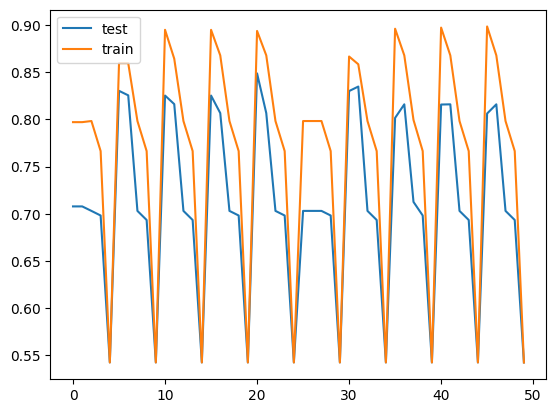

In [ ]:
accuracy_graph(dt_gscv)

In [ ]:
best_dt = dt_gscv.best_estimator_

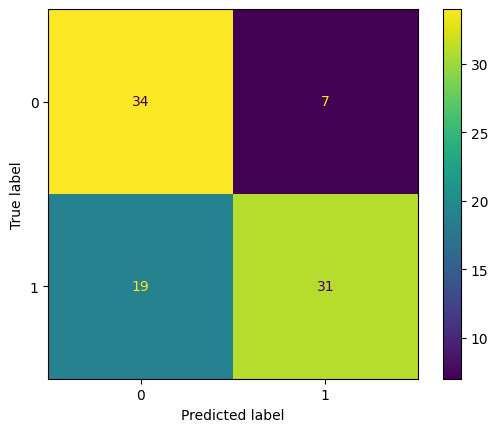

In [ ]:
y_test_pred = best_dt.predict(X_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred)).plot()
plt.show(block=True);

In [ ]:
print(classification_report(y_test, y_test_pred, target_names = ['target 0', 'target 1']))

              precision    recall  f1-score   support

    target 0       0.64      0.83      0.72        41
    target 1       0.82      0.62      0.70        50

    accuracy                           0.71        91
   macro avg       0.73      0.72      0.71        91
weighted avg       0.74      0.71      0.71        91



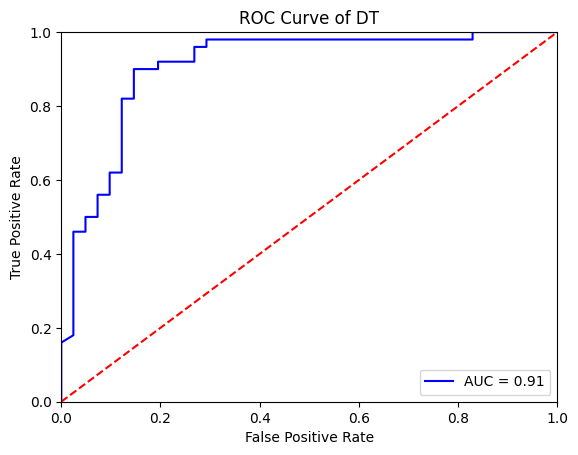

In [ ]:
show_roc_curve(best_nb, 'DT', X_test_transformed, y_test)

In [ ]:
add_scores(y_test, y_test_pred, "DT")

     Accuracy  Recall  Precision  F1-Score
NB   0.857143    0.86   0.877551  0.868687
LR   0.813187    0.82   0.836735  0.828283
kNN  0.813187    0.78   0.866667  0.821053
DT   0.714286    0.62   0.815789  0.704545
